In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TSLA.csv')
print(df)

           Date Close/Last     Volume      Open       High        Low
0    06/27/2023    $250.21  164968200   $243.24  $250.3899    $240.85
1    06/26/2023    $241.05  179990600  $250.065    $258.37    $240.70
2    06/23/2023    $256.60  177460800   $259.29    $262.45    $252.80
3    06/22/2023    $264.61  166875900   $250.77    $265.00    $248.25
4    06/21/2023    $259.46  211797100   $275.13    $276.99    $257.78
..          ...        ...        ...       ...        ...        ...
109  01/19/2023    $127.17  170291900   $127.26    $129.99  $124.3082
110  01/18/2023    $128.78  195680300  $136.555    $136.68    $127.01
111  01/17/2023    $131.49  186477000  $125.695    $131.70    $125.02
112  01/13/2023    $122.40  180714100   $116.55    $122.63    $115.60
113  01-12-2023    $123.56  169400900   $122.56  $124.1311    $117.00

[114 rows x 6 columns]


In [2]:
print(df.describe())

             Volume
count  1.140000e+02
mean   1.555331e+08
std    3.797629e+07
min    8.896504e+07
25%    1.259155e+08
50%    1.525214e+08
75%    1.800116e+08
max    3.065906e+08


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close/Last']]
print(df)

           Close/Last
Date                 
2023-06-27    $250.21
2023-06-26    $241.05
2023-06-23    $256.60
2023-06-22    $264.61
2023-06-21    $259.46
...               ...
2023-01-19    $127.17
2023-01-18    $128.78
2023-01-17    $131.49
2023-01-13    $122.40
2023-01-12    $123.56

[114 rows x 1 columns]


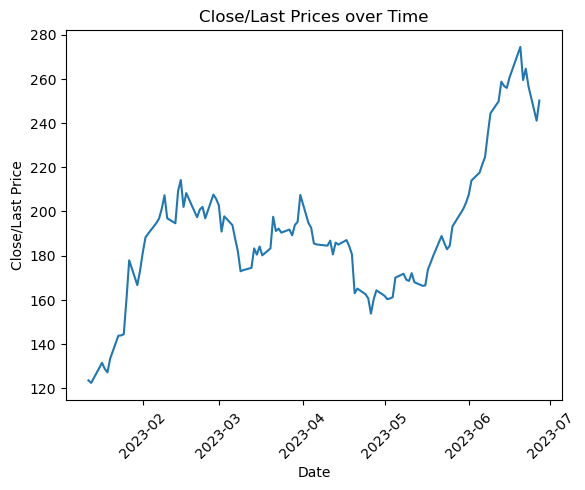

In [4]:
df['Close/Last'] = df['Close/Last'].replace({'\$': ''}, regex=True).astype(float)

plt.plot(df.index, df['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('Close/Last Prices over Time')
plt.xticks(rotation=45) 
plt.show()

In [5]:
pip install pandas_ta


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas_ta

In [7]:
df.ta.ema(close='Close/Last', length=10, append=True)

Date
2023-06-27           NaN
2023-06-26           NaN
2023-06-23           NaN
2023-06-22           NaN
2023-06-21           NaN
                 ...    
2023-01-19    152.529518
2023-01-18    148.211424
2023-01-17    145.171165
2023-01-13    141.030953
2023-01-12    137.854416
Name: EMA_10, Length: 114, dtype: float64

In [8]:
print(df.head(10))

            Close/Last   EMA_10
Date                           
2023-06-27      250.21      NaN
2023-06-26      241.05      NaN
2023-06-23      256.60      NaN
2023-06-22      264.61      NaN
2023-06-21      259.46      NaN
2023-06-20      274.45      NaN
2023-06-16      260.54      NaN
2023-06-15      255.90      NaN
2023-06-14      256.79      NaN
2023-06-13      258.71  257.832


In [9]:
df = df.iloc[10:]

In [10]:
print(df.head(10))

            Close/Last      EMA_10
Date                              
2023-06-12      249.83  256.377091
2023-06-09      244.40  254.199438
2023-06-08      234.86  250.683177
2023-06-07      224.57  245.935326
2023-06-06      221.31  241.457994
2023-06-05      217.61  237.121995
2023-06-02      213.97  232.912542
2023-06-01      207.52  228.295716
2023-05-31      203.93  223.865586
2023-05-30      201.16  219.737297


C:\Users\Ghosal\AppData\Local\Temp\ipykernel_5536\2294550980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Close/Last'] = pd.to_numeric(df['Close/Last'])
C:\Users\Ghosal\AppData\Local\Temp\ipykernel_5536\2294550980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'EMA_10'] = pd.to_numeric(df['EMA_10'])


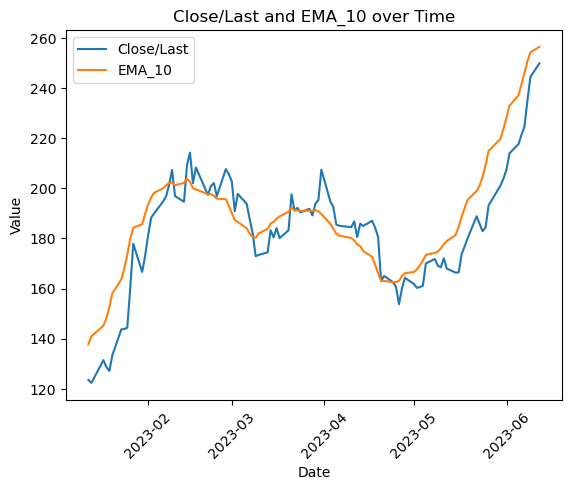

In [11]:
df.loc[:, 'Close/Last'] = pd.to_numeric(df['Close/Last'])
df.loc[:, 'EMA_10'] = pd.to_numeric(df['EMA_10'])

plt.plot(df.index, df['Close/Last'], label='Close/Last')
plt.plot(df.index, df['EMA_10'], label='EMA_10')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Close/Last and EMA_10 over Time')
plt.xticks(rotation=45) 
plt.legend() 
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Close/Last'], df[['EMA_10']], test_size=.2)

In [13]:
print(X_test.head())
print(X_train.head())
print(y_train.head())
print(y_test.head())

Date
2023-01-13    122.40
2023-06-07    224.57
2023-05-24    182.90
2023-05-05    170.06
2023-02-10    196.89
Name: Close/Last, dtype: float64
Date
2023-03-22    191.15
2023-03-16    184.13
2023-03-28    189.19
2023-06-02    213.97
2023-04-04    192.58
Name: Close/Last, dtype: float64
                EMA_10
Date                  
2023-03-22  191.191710
2023-03-16  187.931777
2023-03-28  190.942199
2023-06-02  232.912542
2023-04-04  183.842224
                EMA_10
Date                  
2023-01-13  141.030953
2023-06-07  245.935326
2023-05-24  204.559647
2023-05-05  173.483357
2023-02-10  201.194112


In [14]:
print(X_test.describe())
print()
print(X_train.describe())

count     21.000000
mean     182.916667
std       25.183605
min      122.400000
25%      170.060000
50%      188.270000
75%      195.280000
max      224.570000
Name: Close/Last, dtype: float64

count     83.000000
mean     183.267952
std       23.501986
min      123.560000
25%      167.905000
50%      184.510000
75%      197.125000
max      249.830000
Name: Close/Last, dtype: float64


In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

X_train=np.array(X_train)
X_test=np.array(X_test)

In [16]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 value:", r2_score(y_test, y_pred))

Model Coefficients: [[0.81146511]]
Mean Absolute Error: 8.266970999694086
R2 value: 0.8103260560170072


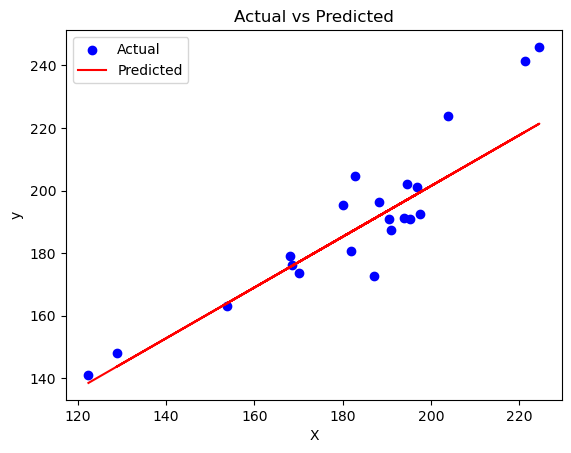

In [20]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [21]:
print(y_pred)
print()
print(X_test)

[[138.49281996]
 [221.40021047]
 [187.58645925]
 [177.16724721]
 [198.93885617]
 [194.07818015]
 [190.94592481]
 [185.34681554]
 [193.68056224]
 [186.85614065]
 [163.93225123]
 [175.47939978]
 [143.66996738]
 [204.65157056]
 [197.63239734]
 [191.9440269 ]
 [175.93382024]
 [218.75483421]
 [197.11305967]
 [196.49634618]
 [199.4987671 ]]

[[122.4 ]
 [224.57]
 [182.9 ]
 [170.06]
 [196.89]
 [190.9 ]
 [187.04]
 [180.14]
 [190.41]
 [182.  ]
 [153.75]
 [167.98]
 [128.78]
 [203.93]
 [195.28]
 [188.27]
 [168.54]
 [221.31]
 [194.64]
 [193.88]
 [197.58]]
